In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 100000000)
import warnings



df = pd.read_excel('input_ml_data.xlsx', sheet_name='E Comm')

In [45]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [46]:
df.info()

# Variables needed to be changed:
# CustomerID
# CityTier

df.CustomerID = df.CustomerID.astype(object)
df.CustomerID = df.CityTier.astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
from src.preprocessing import feature_engineering, eda 

fe = feature_engineering.Preprocess()
eda = eda.Eda()


In [6]:
## Exploratory Data Analysis

<AxesSubplot:title={'center':'Churn distribution'}, ylabel='Frequency'>

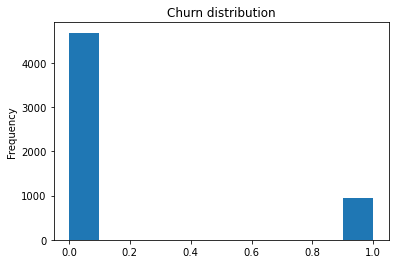

In [5]:
## Plot target label distribution

df.Churn.plot.hist(title = 'Churn distribution')

In [8]:
# here we can see a clearn inbalance problem. We might use come techniques.

In [6]:
# look for missing values


eda.missing_values_table(df)

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


In [12]:
# some missing values but at least non the columns have more than 50% of missing values out of the total values

<AxesSubplot:title={'center':'Ternure relationship with Churn '}, xlabel='Tenure', ylabel='Density'>

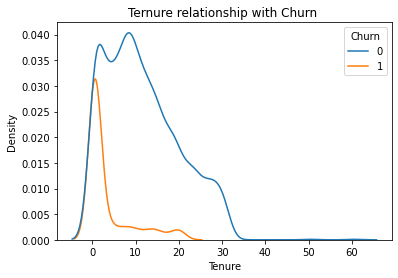

In [14]:
# lets plot some distributions

plt.title('Ternure relationship with Churn ')
sns.kdeplot(df['Tenure'] , hue= df['Churn'])

Distribution plot makes sense. 
- Plot is skeweed to the left. Overall customers have a ternure from 0 - 10
- Churn customers have the lowest tenure from 0 - 5

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


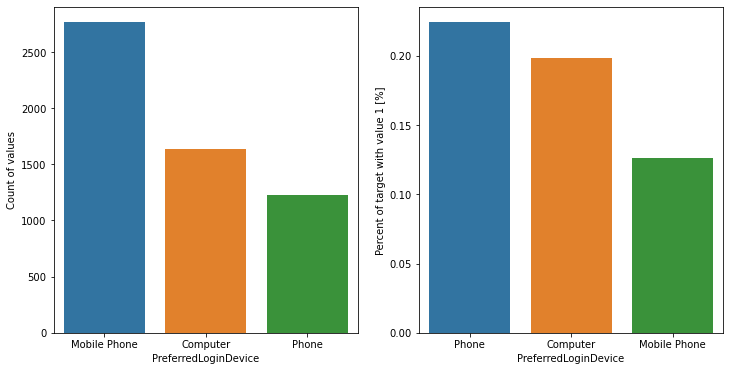

In [16]:
eda.plot_cat_feature(df, 'PreferredLoginDevice', 'Churn')

- There is two categories than could potentially be together, 'Mobile Phone' and 'Phone'
- Botth Phone and Computer devices are related with churn with 20%

<AxesSubplot:title={'center':'Distance to home relationship with Churn '}, xlabel='WarehouseToHome', ylabel='Density'>

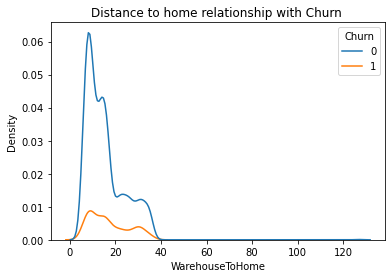

In [17]:


plt.title('Distance to home relationship with Churn ')
sns.kdeplot(df['WarehouseToHome'] , hue= df['Churn'])


/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


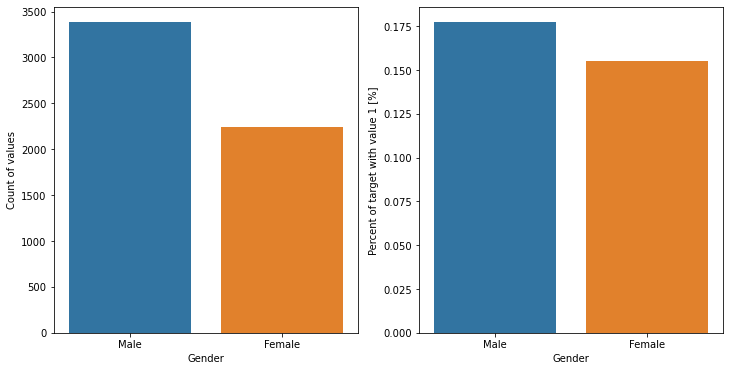

In [18]:
eda.plot_cat_feature(df, 'Gender', 'Churn')

- Plot shows that there is no discrimination on gender with relationship with Churn 


<AxesSubplot:title={'center':'HourSpendOnApp relationship with Churn '}, xlabel='HourSpendOnApp', ylabel='Density'>

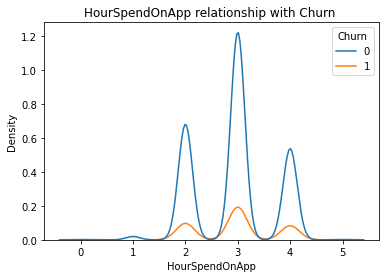

In [28]:

plt.title('HourSpendOnApp relationship with Churn ')
sns.kdeplot(df['HourSpendOnApp'] , hue= df['Churn'])


<AxesSubplot:title={'center':'SatisfactionScore relationship with Churn '}, xlabel='SatisfactionScore', ylabel='Density'>

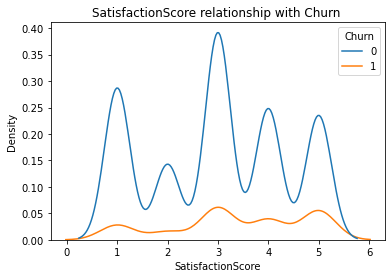

In [31]:


plt.title('SatisfactionScore relationship with Churn ')
sns.kdeplot(df['SatisfactionScore'] , hue= df['Churn'])


- This is counterintuitive. Assuming 5 is the completley satisfied. There are some picks in churn on customers with score 3 and 5

<AxesSubplot:title={'center':'Complain relationship with Churn '}, xlabel='Complain', ylabel='Density'>

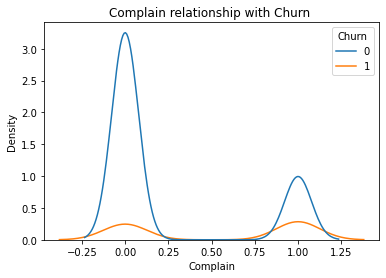

In [32]:

plt.title('Complain relationship with Churn ')
sns.kdeplot(df['Complain'] , hue= df['Churn'])
DaySinceLastOrder	CashbackAmount

<AxesSubplot:title={'center':'DaySinceLastOrder relationship with Churn '}, xlabel='DaySinceLastOrder', ylabel='Density'>

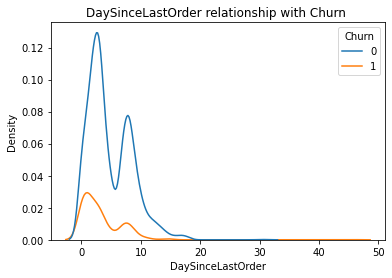

In [33]:

plt.title('DaySinceLastOrder relationship with Churn ')
sns.kdeplot(df['DaySinceLastOrder'] , hue= df['Churn'])

<AxesSubplot:title={'center':'CashbackAmount relationship with Churn '}, xlabel='CashbackAmount', ylabel='Density'>

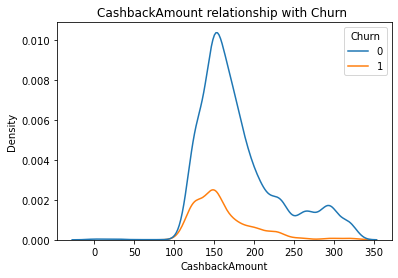

In [34]:
plt.title('CashbackAmount relationship with Churn ')
sns.kdeplot(df['CashbackAmount'] , hue= df['Churn'])
	

In [40]:
# Check correlations with customer

correlations = df.corr()['Churn'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

Most Negative Correlations:
 Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154118
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
Name: Churn, dtype: float64


<Figure size 360x360 with 0 Axes>

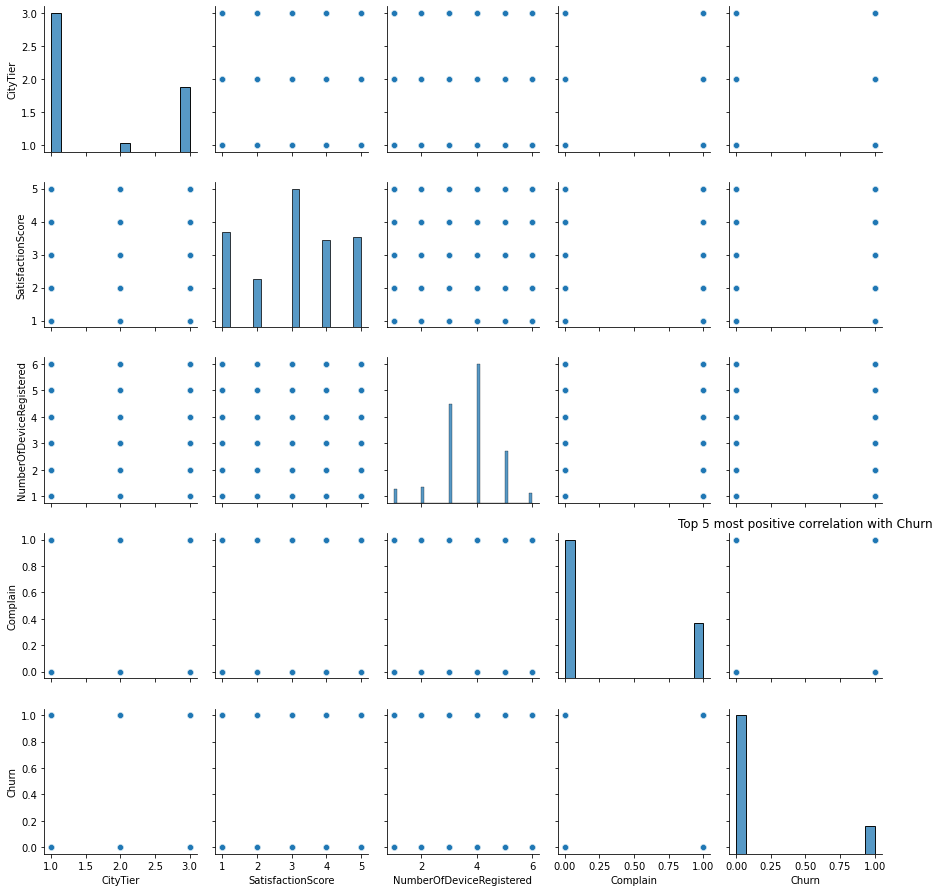

In [46]:

plt.figure(figsize=(5,5))
sns.pairplot(df[['CityTier', 'SatisfactionScore','NumberOfDeviceRegistered','Complain' ,'Churn']])
plt.title('Top 5 most positive correlation with Churn')
plt.tight_layout()
plt.show()


<Figure size 360x360 with 0 Axes>

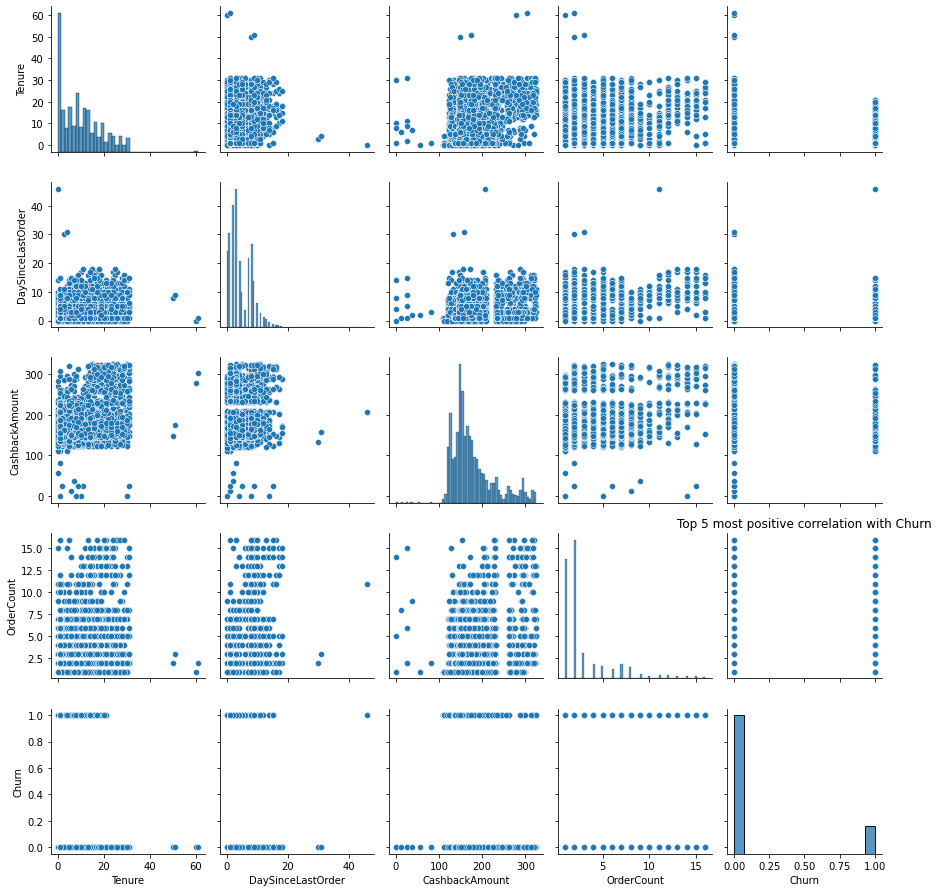

In [47]:

plt.figure(figsize=(5,5))
sns.pairplot(df[['Tenure', 'DaySinceLastOrder','CashbackAmount','OrderCount' ,'Churn']])
plt.title('Top 5 most negative correlation with Churn')
plt.tight_layout()
plt.show()

In [ ]:
# Feature engineeing

fe_df['Ternure_mean'] = fe_df.groupby('CustomerID')['Tenure'].transform("mean")
fe_df['WarehouseToHome_mean'] = fe_df.groupby('CustomerID')['WarehouseToHome'].transform("mean")
fe_df['HourSpendOnApp_mean'] = fe_df.groupby('CustomerID')['HourSpendOnApp'].transform("mean")
fe_df['SatisfactionScore_mean'] = fe_df.groupby('CustomerID')['SatisfactionScore'].transform("mean")
fe_df['Complain_mean'] = fe_df.groupby('CustomerID')['Complain'].transform("mean")

fe_df['Ternure_mean_gender'] = fe_df.groupby('Gender')['Tenure'].transform("mean")
fe_df['WarehouseToHome_mean_gender'] = fe_df.groupby('Gender')['WarehouseToHome'].transform("mean")
fe_df['HourSpendOnApp_mean_gender'] = fe_df.groupby('Gender')['HourSpendOnApp'].transform("mean")
fe_df['SatisfactionScore_mean_gender'] = fe_df.groupby('Gender')['SatisfactionScore'].transform("mean")
fe_df['Complain_mean_gender'] = fe_df.groupby('Gender')['Complain'].transform("mean")


In [79]:
features = fe_df.copy()
features.select_dtypes(['object', 'category']).apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

PreferredPaymentMode    7
PreferedOrderCat        6
CustomerID              3
PreferredLoginDevice    3
CityTier                3
MaritalStatus           3
Gender                  2
dtype: int64

In [80]:
# Minor adjustmnest to reduce dimensionality on cateogrical variaables

features['PreferredLoginDevice'] = features.PreferredLoginDevice.str.replace('Mobile Phone', 'Phone')
features['PreferedOrderCat'] = features.PreferedOrderCat.str.replace('Mobile Phone', 'Mobile')

In [81]:
# caategorical encoding values encoding

features = pd.get_dummies(features)

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")  
features[:] = imputer.fit_transform(features)

In [83]:
# Prepare dataset for training
target = features.pop('Churn') 
features['Churn'] = target
X = features.iloc[:, :-1]
y = features['Churn']

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [84]:
from sklearn.preprocessing import StandardScaler

# Initialize  Standarization 
sc = StandardScaler()

# Standarize Training  and Test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

X_sc = sc.fit_transform(X)

In [85]:
# Set up baseline
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Initialize baseline with fixed random_state
baseline = RandomForestClassifier(random_state=1, class_weight = 'balanced')

# Fit Baseline with original training data
baseline.fit(X_train_sc, y_train)

print(f'Baseline Training Accuracy: {np.mean(baseline.predict(X_train_sc) == y_train)*100:.2f}% ')
print(f'Baseline Test Accuracy: {np.mean(baseline.predict(X_test_sc) == y_test)*100:.2f}% ')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(baseline, X_sc, y, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))


Baseline Training Accuracy: 100.00% 
Baseline Test Accuracy: 95.68% 
Mean ROC AUC: 0.994


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


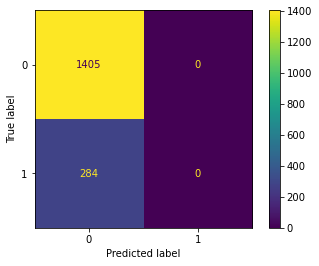

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
cm = confusion_matrix(y_test,baseline.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [92]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from  collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('RandomUnderSampler dataset shape', Counter(y_rus))

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('RandomOverSampler dataset shape', Counter(y_ros))



original dataset shape: Counter({0.0: 4233, 1.0: 841})
RandomUnderSampler dataset shape Counter({0.0: 841, 1.0: 841})
Original dataset shape Counter({0.0: 4233, 1.0: 841})
RandomOverSampler dataset shape Counter({1.0: 4233, 0.0: 4233})


In [102]:
# Set up baseline
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Initialize baseline with fixed random_state
baseline_rus = RandomForestClassifier(random_state=1, class_weight = 'balanced')
# train test split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=1)


In [103]:
# Scailing data
X_train_rus_sc = sc.fit_transform(X_train_rus)
X_test_rus_sc = sc.fit_transform(X_test_rus)

X_rus_sc = sc.fit_transform(x_rus)
# Fitting model with data
baseline_rus.fit(X_train_rus_sc, y_train_rus)

print(f'Baseline Training Accuracy: {np.mean(baseline_rus.predict(X_train_rus_sc) == y_train_rus)*100:.2f}% ')
print(f'Baseline Test Accuracy: {np.mean(baseline_rus.predict(X_test_rus) == y_test_rus)*100:.2f}% ')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(baseline_rus, X_rus_sc, y_rus, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Baseline Training Accuracy: 100.00% 
Baseline Test Accuracy: 60.40% 


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Mean ROC AUC: 0.979


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


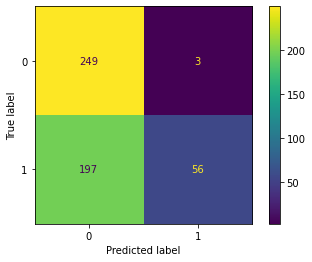

In [109]:
cm_rus = confusion_matrix(y_test_rus,baseline_rus.predict(X_test_rus))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot()

In [111]:
# random over sampling

# Initialize baseline with fixed random_state
baseline_ros = RandomForestClassifier(random_state=1, class_weight = 'balanced')
# train test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=1)

# Scailing data
X_train_ros_sc = sc.fit_transform(X_train_ros)
X_test_ros_sc = sc.fit_transform(X_test_ros)

X_ros_sc = sc.fit_transform(x_ros)
# Fitting model with data
baseline_ros.fit(X_train_ros_sc, y_train_ros)

print(f'Baseline Training Accuracy: {np.mean(baseline_ros.predict(X_train_ros_sc) == y_train_ros)*100:.2f}% ')
print(f'Baseline Test Accuracy: {np.mean(baseline_ros.predict(X_test_ros) == y_test_ros)*100:.2f}% ')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(baseline_ros, X_ros_sc, y_ros, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Baseline Training Accuracy: 100.00% 
Baseline Test Accuracy: 52.09% 


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Mean ROC AUC: 1.000


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


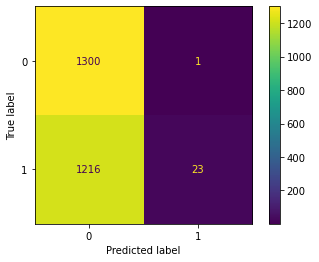

In [112]:
cm_ros = confusion_matrix(y_test_ros,baseline_ros.predict(X_test_ros))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_ros)
disp.plot()